In [272]:
import numpy as np # <-- Import numpy to use arrays
import pandas as pd # <-- Import pandas to use dataframes
import matplotlib.pyplot as plt # <-- Import matplotlib to plot data

# Exercise 1 - Life cycle assessment of current electricity production

In this exercise, we will calculate the environmental impact of the current electricity production in a fictious country. We will consider the manufacturing and operation of different power plants, as well as the manufacturing of wind turbines and solar panels. We will also consider the treatment of waste from the manufacturing of these products. The environmental impact will be calculated using the ReCiPe method, which includes the following impact categories:

- Climate change
- Human toxicity
- Metals
- Water
- Fine particles emissions

The environmental impact will be calculated per unit of electricity produced by each technology. The results will be presented in stacked bar charts, with each bar representing the contribution of different activities to the total impact in each category.

### List of activities in the system (can also be found in emission_factors.csv)

In [594]:
activities=[
    "steel",
    "concrete",
    "copper",
    "glass fibre reinforced plastic",
    "neodymium",
    "concrete waste treatment",
    "glass waste treatment",
    "silicone",
    "glass",
    "aluminium",
    "silver",
    "deionized water",
    "hard coal",
    "water",
    "natural gas",
]

## Add activities for manufacturing and operation of power plants

In [596]:
activities.extend(
    [f"{x} ({y})" 
    for y in ("build", "op") 
    for x in (
        "wind turbine",
        "solar panel",
        "hard coal power plant",
        "natural gas power plant",
        "hydro power plant",
    )]
)

### Add activity for grid electricity

In [598]:
activities.append("grid electricity")

### Create a dictionary to map activities to indices in the matrix

In [600]:
activities = {activity: i for i, activity in enumerate(activities)}

### For convenience, we create smaller dictionary for each type of activity

In [602]:
mat = {
    k: v for k, v in activities.items() if k in (
    "steel",
    "concrete",
    "copper",
    "glass fibre reinforced plastic",
    "neodymium",
    "concrete waste treatment",
    "glass waste treatment",
    "silicone",
    "glass",
    "aluminium",
    "silver",
    "deionized water",
    "hard coal",
    "water",
    "natural gas",
    )
}

build = {
    k: v for k, v in activities.items() if k in (
        "wind turbine (build)",
        "solar panel (build)",
        "hard coal power plant (build)",
        "natural gas power plant (build)",
        "hydro power plant (build)",
    )
}

op = {
    k: v for k, v in activities.items() if k in (
        "wind turbine (op)",
        "solar panel (op)",
        "hard coal power plant (op)",
        "natural gas power plant (op)",
        "hydro power plant (op)",
    )
}

# Lifetime production for each power plant
lifetime_production = {
    'wind turbine': 900_000_000 * 20,  # kWh over lifetime
    'solar panel': 150_000_000 * 25,    # kWh over lifetime
    'coal power plant': 3_500_000_000 * 40,  # kWh over lifetime
    'natural gas power plant': 3_500_000_000 * 30,  # kWh over lifetime
    'hydro power plant': 4_380_000_000 * 50,  # kWh over lifetime
}

grid = activities["grid electricity"]

direct = {
    v: k for k, v in enumerate(
        (
            "CO2",
            "CH4",
            "N2O",
            "Tebuconazole",
            "Mercury",
            "Antimony",
            "Water",
            "PM 2.5",
            "PM 2.5-10",
            "PM 10",
        )
)
}

### Create a matrix A to represent the system, with ones on the diagonal

In [604]:
A=np.identity(len(activities))

### Load emission factors and characterization factors

In [606]:
ef=np.genfromtxt(
    'emission_factors.csv',
    delimiter=',',
    skip_header=1,
    usecols=range(3, 13)
)

In [607]:
cf=np.genfromtxt(
    'characterization_factors.csv',
    delimiter=',',
    skip_header=1,
    usecols=range(1, 6),
    filling_values=0,
)

### Create a matrix B and include the emission factors

In [609]:
B=np.zeros((len(activities), ef.shape[1]))

In [610]:
B[:ef.shape[0], :]=ef

### Fill the matrix A with instructions contained in powerplants_data.md
Input values must be negative, as they represent the consumption of
products from other activities

In [612]:
# Fill the matrix A
# Manufacturing of wind turbine
A[mat['steel'], build['wind turbine (build)']] = -30000 * 1000 # tons
A[mat['concrete'], build['wind turbine (build)']] = -150000 * 1000 # tons
A[mat['copper'], build['wind turbine (build)']] = -1500 * 1000 # tons
A[mat['glass fibre reinforced plastic'], build['wind turbine (build)']] = -3000 * 1000 # tons
A[mat['neodymium'], build['wind turbine (build)']] = -30 * 1000  # tons
A[grid, build['wind turbine (build)']] = -4500 * 1000  # MWh to kWh
A[mat['concrete waste treatment'], build['wind turbine (build)']] = -120000 * 1000  # tons
A[mat['glass waste treatment'], build['wind turbine (build)']] = -3000 * 1000  # tons

# Manufacturing of solar panel
A[mat['silicone'], build['solar panel (build)']] = -5000 * 1000  # tons
A[mat['glass'], build['solar panel (build)']] = -10000  * 1000 # tons
A[mat['aluminium'], build['solar panel (build)']] = -2000  * 1000 # tons
A[mat['silver'], build['solar panel (build)']] = -100 * 1000 # tons
A[grid, build['solar panel (build)']] = -50000 * 1000  # MWh to kWh

# Manufacturing of coal power plant
A[mat['steel'], build['hard coal power plant (build)']] = -100000 * 1000 # tons
A[mat['concrete'], build['hard coal power plant (build)']] = -250000 * 1000 # tons
A[mat['copper'], build['hard coal power plant (build)']] = -1000 * 1000 # tons
A[grid, build['hard coal power plant (build)']] = -10000 * 1000 # MWh to kWh

# Manufacturing of natural gas power plant
A[mat['steel'], build['natural gas power plant (build)']] = -50000 * 1000 # tons
A[mat['concrete'], build['natural gas power plant (build)']] = -200000  # tons
A[mat['copper'], build['natural gas power plant (build)']] = -1500 * 1000 # tons
A[grid, build['natural gas power plant (build)']] = -10000 * 1000 # MWH to kWh

# Manufacturing of hydropower plant
A[mat['steel'], build['hydro power plant (build)']] = -300000 * 1000 # tons
A[mat['concrete'], build['hydro power plant (build)']] = -1000000 * 1000 # tons
A[mat['copper'], build['hydro power plant (build)']] = -10000 * 1000 # tons
A[grid, build['hydro power plant (build)']] = -30000 * 1000 # MWh to kWh

# Operations consuming resources
A[mat['water'], op['solar panel (op)']] = -1 * 0.001  # L water/kWh 
A[mat['hard coal'], op['hard coal power plant (op)']] = -0.3 # kg/kWh
A[mat['water'], op['hard coal power plant (op)']] = -2.5  # L/kWh
A[mat['natural gas'], op['natural gas power plant (op)']] = -0.15  # m³/kWh
A[mat['water'], op['natural gas power plant (op)']] = -1.2  # L/kWh
A[mat['water'], op['hydro power plant (op)']] = -2  # L/kWh


# Manufacturing input to operation (amortized over lifetime production)
A[build['wind turbine (build)'], op['wind turbine (op)']] = -1 / lifetime_production['wind turbine']
A[build['solar panel (build)'], op['solar panel (op)']] = -1 / lifetime_production['solar panel']
A[build['hard coal power plant (build)'], op['hard coal power plant (op)']] = -1 / lifetime_production['coal power plant']
A[build['natural gas power plant (build)'], op['natural gas power plant (op)']] = -1 / lifetime_production['natural gas power plant']
A[build['hydro power plant (build)'], op['hydro power plant (op)']] = -1 / lifetime_production['hydro power plant']

# Grid electricity
A[op['hard coal power plant (op)'], grid] = -0.4
A[op['natural gas power plant (op)'], grid] = -0.3
A[op['hydro power plant (op)'], grid] = -0.2
A[op['wind turbine (op)'], grid] = -0.05
A[op['solar panel (op)'], grid] = -0.05


### Fill the matrix B with direct emissions to the environment

In [614]:
B[op['hard coal power plant (op)'], direct['CO2']]=0.820
B[op['natural gas power plant (op)'], direct['CO2']]=0.450
B[op['hydro power plant (op)'], direct['CH4']]=0.002

### Calculate the impact of the system, per technology and store the results in a list

In [616]:
import matplotlib.pyplot as plt
scores = []
technologies = [
    "wind turbine (op)",
    "solar panel (op)",
    "hard coal power plant (op)",
    "natural gas power plant (op)",
    "hydro power plant (op)",
    "grid electricity",
]
for technology in technologies:
    f=np.zeros(len(activities))
    f[activities[technology]]=1
    A_inv = np.linalg.solve(A, f)
    C = A_inv*B.T
    D=(C.T@cf)
    scores.append(D)

In [617]:
# Turn the list into a numpy array

In [618]:
scores=np.stack(scores)

In [619]:
scores.shape

(6, 26, 5)

In [620]:
indicators = [
    "Climate change",
    "Human toxicity",
    "Metals",
    "Water",
    "Fine particle"
]
units = [
    "kg CO2 eq",
    "CTUh",
    "kg antimony eq",
    "m3 water",
    "kg PM 2.5 eq"
]

In [621]:
activities_colors = {
    "steel": "tab:red",
    "concrete": "tab:red",
    "copper": "tab:red",
    "glass fibre reinforced plastic": "tab:red",
    "neodymium": "tab:red",
    "silicone": "tab:red",
    "glass": "tab:red",
    "aluminium": "tab:red",
    "silver": "tab:red",
    "deionized water": "tab:red",
    "water": "tab:red",
    "hard coal": "tab:orange",
    "natural gas": "tab:orange",
    "concrete waste treatment": "tab:blue",
    "glass waste treatment": "tab:blue",
    'wind turbine (build)': "tab:brown",
    'solar panel (build)': "tab:brown",
    'hard coal power plant (build)': "tab:brown",
    'natural gas power plant (build)': "tab:brown",
    'hydro power plant (build)': "tab:brown",
    "wind turbine (op)": "tab:brown",
    "solar panel (op)": "tab:gray",
    "hard coal power plant (op)": "tab:gray",
    "natural gas power plant (op)": "tab:gray",
    "hydro power plant (op)": "tab:gray",
    "grid electricity": "tab:gray",
}

### Plot the results in stacked bar charts


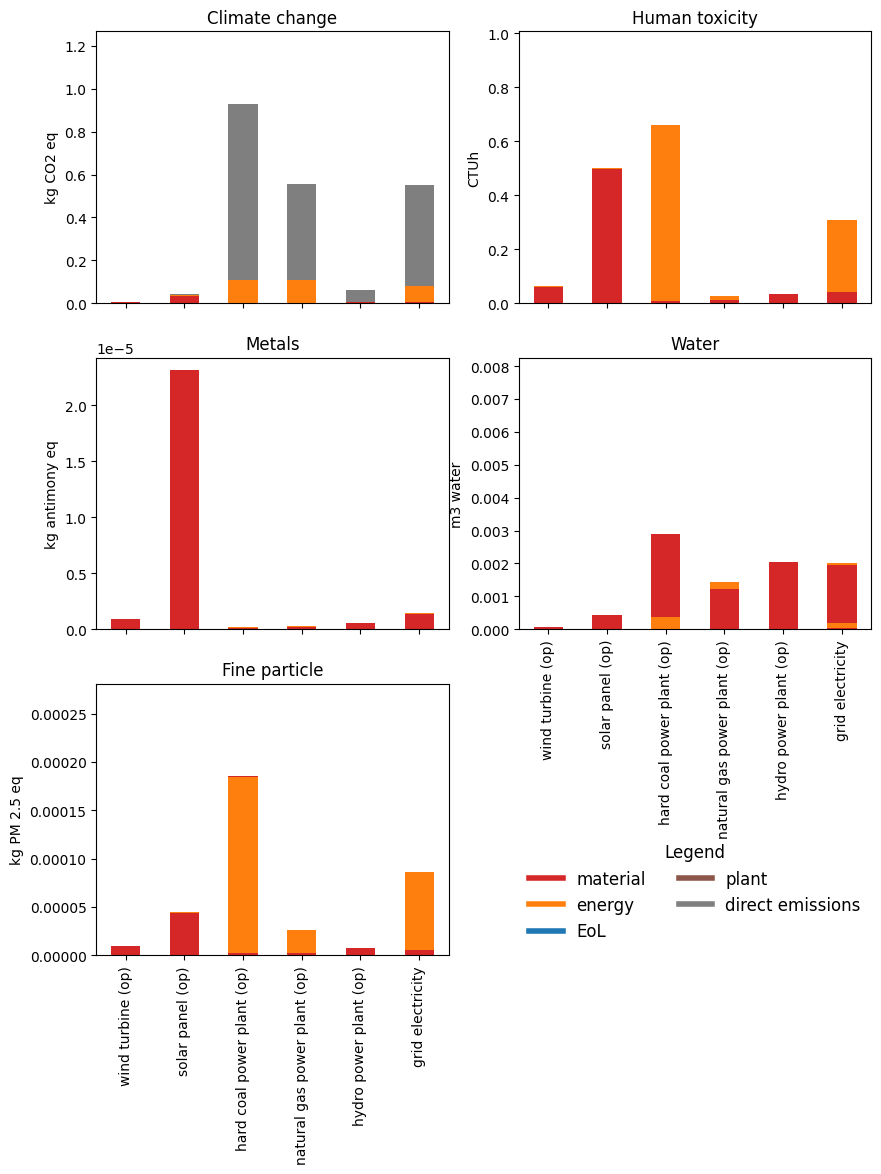

In [622]:
import matplotlib

colors = matplotlib.colormaps.get_cmap('tab20b', )
# Number of plots and bars
num_plots = scores.shape[2]  # 5 plots
num_bars = scores.shape[0]   # 6 bars per plot

# Create the figure and a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot stacked bars for each plot
for i in range(num_plots):
    ax = axes[i]  # Access individual subplot
    bottom = np.zeros(num_bars)  # Start bottom at zero for stacking

    pd.DataFrame(scores[..., i], index=technologies).plot(
        kind="bar", stacked=True, ax=ax, 
        color=[activities_colors[activity] for activity in activities],
        legend=False, bottom=bottom,
    )

    ax.set_title(f'{indicators[i]}')
    ax.set_ylabel(units[i])
    if i not in (3, 4):
        ax.set_xticklabels([])
    ax.set_ylim(0, max(scores[:, :, i].sum(0)) * 1.1)  # Set y-axis limit to max value
    ax.legend().remove()
    


axes[-1].axis('off')
# add custom legend
handles = ["material", "energy", "EoL", "plant", "direct emissions"]
colors = ["tab:red", "tab:orange", "tab:blue", "tab:brown", "tab:gray"]
labels = ["material", "energy", "EoL", "plant", "direct emissions"]
legend = [plt.Line2D([0], [0], color=colors[i], lw=4, label=labels[i]) for i in range(5)]
axes[-1].legend(handles=legend, loc='lower center', title='Legend', title_fontsize='large', fontsize='large', frameon=False, ncol=2)

# Adjust layout and display the plot
#plt.tight_layout()
plt.show()

# Exercise 2 - Apply LCA to scenarios

In this exercise, we will apply the life cycle assessment (LCA) method
 developed above to different scenarios of electricity production.
 
The scenarios are described in scenarios.md, and their corresponding mix is as follows:


In the baseline scenario, the grid slowly transitions toward renewables, but fossil fuels (coal and natural gas) continue to play a major role up to 2050. There is no nuclear energy contribution.


| Year  | Coal (%) | Natural Gas (%) | Hydro (%) | Wind (%) | Solar (%) | Total Renewables (%) |
|-------|----------|-----------------|-----------|----------|-----------|----------------------|
| 2020  | 35       | 30              | 7         | 5        | 4         | 16                   |
| 2025  | 33       | 31              | 7         | 7        | 5         | 19                   |
| 2030  | 30       | 31              | 7         | 10       | 7         | 24                   |
| 2035  | 28       | 30              | 7         | 13       | 9         | 29                   |
| 2040  | 25       | 28              | 7         | 15       | 11        | 33                   |
| 2045  | 20       | 25              | 7         | 18       | 14        | 39                   |
| 2050  | 15       | 22              | 7         | 20       | 16        | 43                   |


In the net-zero scenario, the country rapidly transitions to a fully decarbonized grid, with a strong emphasis on wind, solar, and hydro, and the complete elimination of fossil fuels by 2050.

| Year  | Coal (%) | Natural Gas (%) | Hydro (%) | Wind (%) | Solar (%) | Total Renewables (%) |
|-------|----------|-----------------|-----------|----------|-----------|----------------------|
| 2020  | 35       | 30              | 7         | 5        | 4         | 16                   |
| 2025  | 20       | 25              | 7         | 12       | 9         | 28                   |
| 2030  | 10       | 20              | 8         | 20       | 15        | 43                   |
| 2035  | 5        | 15              | 8         | 25       | 20        | 53                   |
| 2040  | 2        | 10              | 8         | 30       | 25        | 63                   |
| 2045  | 1        | 5               | 8         | 35       | 30        | 73                   |
| 2050  | 0        | 0               | 8         | 40       | 35        | 83                   |


Describe the evolution of the environmental impact of the electricity production system in the two scenarios. Present the results in stacked bar charts, with each bar representing the contribution of different activities to the total impact in each category. Describe the differences between the two scenarios and discuss the implications of the results.


In [623]:
scenarios = {
    "baseline": {
        2020: [0.35, 0.30, 0.07, 0.05, 0.04],
        2025: [0.33, 0.31, 0.07, 0.07, 0.05],
        2030: [0.30, 0.31, 0.07, 0.10, 0.07],
        2035: [0.28, 0.30, 0.07, 0.13, 0.09],
        2040: [0.25, 0.28, 0.07, 0.15, 0.11],
        2045: [0.20, 0.25, 0.07, 0.18, 0.14],
        2050: [0.15, 0.22, 0.07, 0.20, 0.16],
    },
    "net-zero": {
        2020: [0.35, 0.30, 0.07, 0.05, 0.04],
        2025: [0.20, 0.25, 0.07, 0.12, 0.09],
        2030: [0.10, 0.20, 0.08, 0.20, 0.15],
        2035: [0.05, 0.15, 0.08, 0.25, 0.20],
        2040: [0.02, 0.10, 0.08, 0.30, 0.25],
        2045: [0.01, 0.05, 0.08, 0.35, 0.30],
        2050: [0.00, 0.00, 0.08, 0.40, 0.35],
    },
}

### Modify the matrix A to reflect the new scenarios

Calculate the impact of the system for each scenario for each year and store the results in a list.

In [625]:
scores = []

for scenario, values in scenarios.items():
    for year in range(2020, 2051, 5):
        A[op['hard coal power plant (op)'], grid] = -values[year][0]
        A[op['natural gas power plant (op)'], grid] = -values[year][1]
        A[op['hydro power plant (op)'], grid] = -values[year][2]
        A[op['wind turbine (op)'], grid] = -values[year][3]
        A[op['solar panel (op)'], grid] = -values[year][4]
        
        f=np.zeros(len(activities))
        f[activities["grid electricity"]]=1
        A_inv = np.linalg.solve(A, f)
        C = A_inv*B.T
        D=(C.T@cf)
        for a, activity in enumerate(activities):
            for i, indicator in enumerate(indicators):
                scores.append(
                    [scenario, year, activity, indicator, D[a, i]])
        
        

### Store the results in a pandas DataFrame and plot the results in stacked bar charts

In [627]:
scores = pd.DataFrame(scores, columns=["scenario", "year", "activity", "indicator", "score"])

In [637]:
# for readability, replace activity names with categories
scores.replace(
    {
        "steel": "material",
        "concrete": "material",
        "copper": "material",
        "glass fibre reinforced plastic": "material",
        "neodymium": "material",
        "silicone": "material",
        "glass": "material",
        "aluminium": "material",
        "silver": "material",
        "deionized water": "material",
        "water": "material",
        "hard coal": "energy",
        "natural gas": "energy",
        "concrete waste treatment": "EoL",
        "glass waste treatment": "EoL",
        'wind turbine (build)': "plant",
        'solar panel (build)': "plant",
        'hard coal power plant (build)': "plant",
        'natural gas power plant (build)': "plant",
        'hydro power plant (build)': "plant",
        "wind turbine (op)": "direct emissions",
        "solar panel (op)": "direct emissions",
        "hard coal power plant (op)": "direct emissions",
        "natural gas power plant (op)": "direct emissions",
        "hydro power plant (op)": "direct emissions",
        "grid electricity": "other",
    },
    inplace=True,
)

scores = scores.groupby(["scenario", "year", "activity", "indicator"]).sum().reset_index()

activities_colors = {
    "material": "tab:red",
    "energy": "tab:orange",
    'plant': "tab:brown",
    "EoL": "tab:blue",
    "direct emissions": "tab:gray",
    "other": "tab:gray",
}

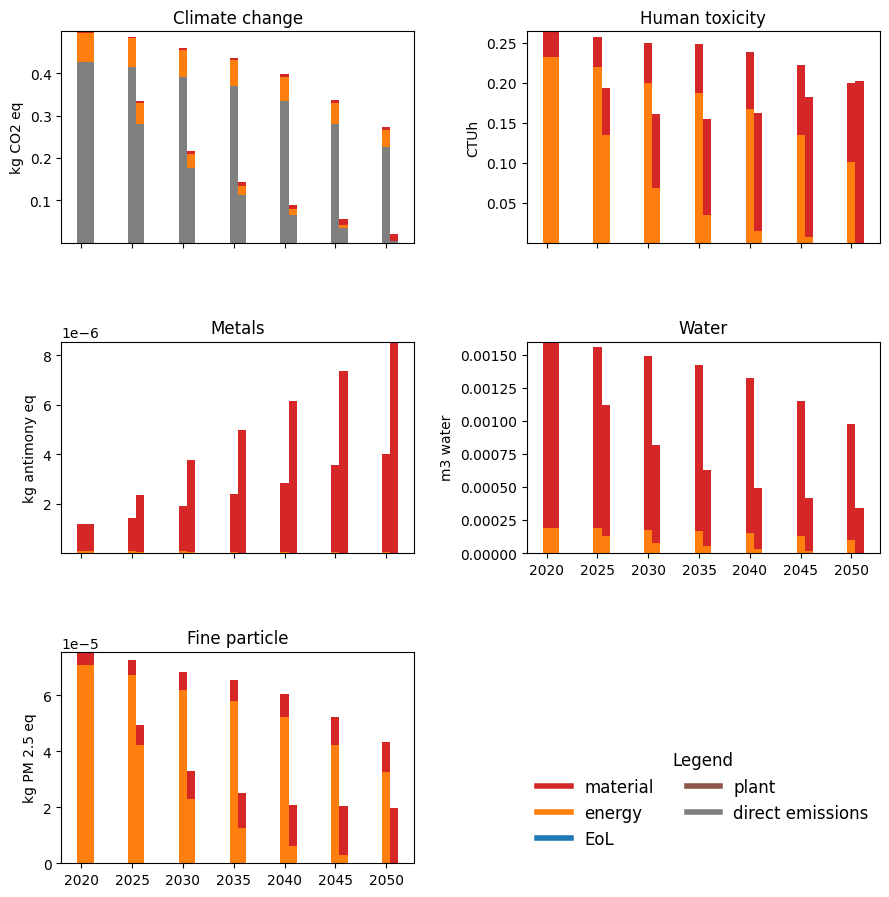

In [651]:
# Set up the figure and axis for the 2x3 grid
fig, axes = plt.subplots(3, 2, figsize=(10, 10), sharex=False)
fig.tight_layout(pad=5.0)

axes = axes.flatten()

# Loop over the indicators and create one plot for each
for i, indicator in enumerate(indicators):
    ax = axes[i]  # Access individual subplot

    pivot_data = scores.loc[scores['indicator'] == indicator].pivot(index='year', columns=['scenario', 'activity'], values='score')
    
    # Stacked bar plot for each scenario and year
    years = pivot_data.index
    scenarios = pivot_data.columns.levels[0]
    activities = pivot_data.columns.levels[1]
    
    width = 0.8  # Set the width of bars
    for j, scenario in enumerate(scenarios):
        bottom = pd.Series(0, index=years)
        for activity in activities:
            ax.bar(years + (j * width), pivot_data[(scenario, activity)], width=width, bottom=bottom, label=activity if j == 0 else "", color=activities_colors[activity])
            bottom += pivot_data[(scenario, activity)]

    ax.set_title(indicator)
    ax.set_ylabel(units[i])
    
    if i not in (3, 4, 5):
        ax.set_xticklabels([])
    else:
        ax.set_xticks(range(2020, 2051, 5))
        ax.set_xticklabels(years)
        
    ax.legend().remove()

# Remove the last empty plot
axes[-1].axis('off')
# add custom legend
handles = ["material", "energy", "EoL", "plant", "direct emissions"]
colors = ["tab:red", "tab:orange", "tab:blue", "tab:brown", "tab:gray"]
labels = ["material", "energy", "EoL", "plant", "direct emissions"]
legend = [plt.Line2D([0], [0], color=colors[i], lw=4, label=labels[i]) for i in range(5)]
axes[-1].legend(handles=legend, loc='lower center', title='Legend', title_fontsize='large', fontsize='large', frameon=False, ncol=2)


# Show the figure
plt.show()


### Answer the following questions.

1. Does the Net Zero scenario achieve net domestic emissions of zero by 2050? Are there residual emissions in the system? If so, what are the main sources of these emissions?

2. Can you identify trade-offs in the Net Zero scenario?